# 1: Create a bar plot that shows distribution of german and british citizens in terms of age.

In [ ]:
Data preparation.

In [1]:
import kkdata
# The code down till the next comment was taken from the code examples given by the teacher
neighbourhoods_in_2015_data = kkdata.STATISTICS[2015].keys()
print('neighbourhoods: ',neighbourhoods_in_2015_data)
print('age range of neighbourhood 1', kkdata.STATISTICS[2015][1].keys(),'\n')
print('20 year olds in hood 1', kkdata.STATISTICS[2015][1][20], '\n')
print('20 year old danes in hood 1 (danes=5100)', kkdata.STATISTICS[2015][1][20][5100])
neighbourhoods = neighbourhoods_in_2015_data

def get_population_stat(year_of_interest=2015):
    neighbourhoods = kkdata.STATISTICS[year_of_interest].keys()
    age_range = set([])
    for n in neighbourhoods:
        age_range.update(kkdata.STATISTICS[year_of_interest][n].keys())

    no_citicens_per_age = {}

    for n in neighbourhoods:
        for age in age_range:
            if age in kkdata.STATISTICS[year_of_interest][n].keys():
                c_codes = set(kkdata.STATISTICS[year_of_interest][n][age].keys())
                for f_code in c_codes:
                    no_citicens_per_age.setdefault(age, 0)
                    no_citicens_per_age[age] += kkdata.STATISTICS[year_of_interest][n][age][f_code]

    return no_citicens_per_age


#The following function was written by yours truly
#It finds the age range for a given year in all neighbourhoods
#and creates an array using those ages. Then loops through all the neighbourhoods again 
#and the ages in the age range we found before, and adds the population to a number of citizens list.
#And finally it returns the list.

def get_code_population(year_of_interest = 2015, code=5100):
    neighbourhoods = kkdata.STATISTICS[year_of_interest].keys()
    age_range = set([])
    for n in neighbourhoods:
        age_range.update(kkdata.STATISTICS[year_of_interest][n].keys())

    no_citizens = {}

    for n in neighbourhoods:
        for age in age_range:
            if age in kkdata.STATISTICS[year_of_interest][n].keys():
                c_codes = set(kkdata.STATISTICS[year_of_interest][n][age].keys())
                for f_code in c_codes:
                    if(code == f_code):
                        no_citizens.setdefault(age, 0)
                        no_citizens[age] += kkdata.STATISTICS[year_of_interest][n][age][code]
    return no_citizens

stats = get_population_stat(2015)
ages = list(stats.keys())
no_citicens = list(stats.values())
print("Let's see")
germans = get_code_population(code = 5180)
british = get_code_population(code = 5170)

neighbourhoods:  dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 99])
age range of neighbourhood 1 dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 103, 106]) 

20 year olds in hood 1 {5100: 678, 5104: 3, 5106: 1, 5110: 21, 5120: 5, 5128: 1, 5130: 6, 5140: 2, 5150: 2, 5154: 6, 5158: 2, 5164: 1, 5170: 6, 5174: 3, 5180: 4, 5182: 1, 5244: 1, 5302: 1, 5314: 3, 5390: 8, 5432: 1, 5442: 1, 5448: 1, 5482: 1, 5486: 1, 5502: 1, 5704: 1, 5776: 1, 5778: 1} 

20 year old danes in hood 1 (danes=5100) 678
Let's see


Creating plotting points for British and German citizens.
Blue: German
Red: British

<IPython.core.display.Javascript object>


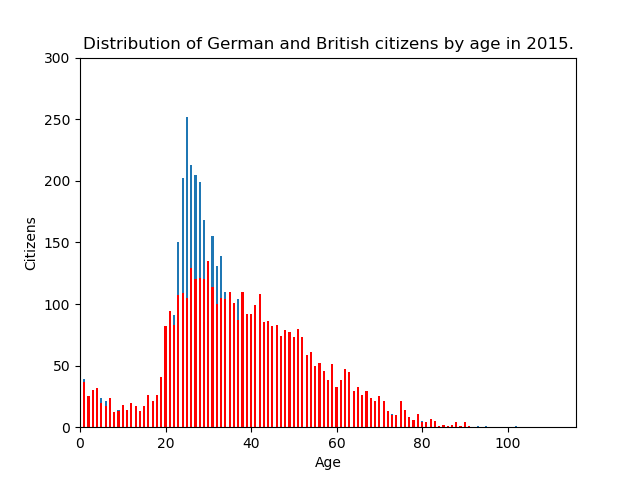

In [55]:
%matplotlib notebook
import matplotlib.pyplot as plt

#Statkoder:
#
# Danmark: 5100
# Frankrig: 5130
# Storbritannien: 5170
# Tyskland: 5180
#############

#plt.cla()
#German
plt.bar(list(germans.keys()), list(germans.values()), width=0.5, align='center') # bar(x-vals, y-vals, bar width, align bar relative to x-val on x-axis) )
#British
plt.bar(list(british.keys()), list(british.values()), width=0.5, align='center', color='red')

#plt.ticklabel_format(useOffset=False)
plt.axis([0, max(ages) + 10, 0, 300]) #axis(x-min, x-max, y-min, y-max)
title = 'Distribution of German and British citizens by age in {}.'.format(2015)
plt.title(title, fontsize=12)
plt.xlabel("Age", fontsize=10)
plt.ylabel("Citizens", fontsize=10)
plt.tick_params(axis='both', which='major', labelsize=10)

# 2: How many French are there compared to Germans and how are they distributed over various neighbourhoods?

Data preparation:

In [2]:
#Pretty much the same functionality as above, except this time the data we look at is based on the neighbourhood and nationality(?) code
def get_area_distribution(year_of_interest = 2015, code=5100):
    neighbourhoods = kkdata.STATISTICS[year_of_interest].keys()
    age_range = set([])
    for n in neighbourhoods:
        age_range.update(kkdata.STATISTICS[year_of_interest][n].keys())

    data = {}

    for n in neighbourhoods:
        for age in age_range:
            if age in kkdata.STATISTICS[year_of_interest][n].keys():
                c_codes = set(kkdata.STATISTICS[year_of_interest][n][age].keys())
                for f_code in c_codes:
                    if(code == f_code):
                        data.setdefault(n, 0)
                        data[n] += kkdata.STATISTICS[year_of_interest][n][age][code]
    
    return data;
german_area = get_area_distribution(code = 5180)
french_area = get_area_distribution(code = 5130)

Creating plotting points for French and German citizens.
Blue: German
Red: French

<IPython.core.display.Javascript object>


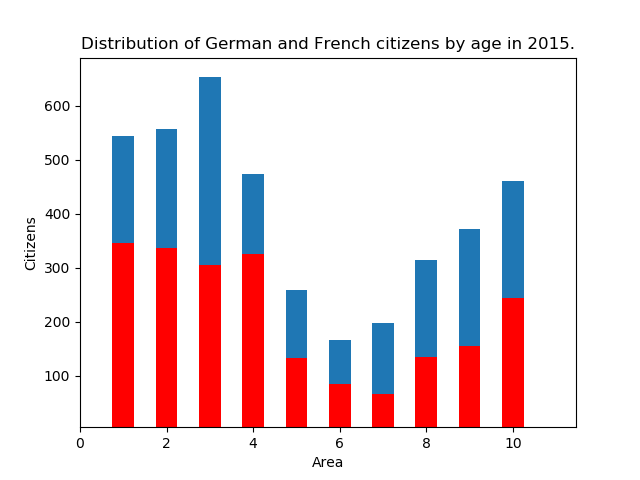

In [65]:
%matplotlib notebook
import matplotlib.pyplot as plt

#Statkoder:
#
# Danmark: 5100
# Frankrig: 5130
# Storbritannien: 5170
# Tyskland: 5180
#############

#plt.cla()
#German
plt.bar(list(german_area.keys()), list(german_area.values()), width=0.5, align='center') # bar(x-vals, y-vals, bar width, align bar relative to x-val on x-axis) )
#British
plt.bar(list(french_area.keys()), list(french_area.values()), width=0.5, align='center', color='red')

#plt.ticklabel_format(useOffset=False)
plt.axis([0, max(ages) + 10, 0, 700]) #axis(x-min, x-max, y-min, y-max)
title = 'Distribution of German and French citizens by age in {}.'.format(2015)
plt.title(title, fontsize=12)
plt.xlabel("Area", fontsize=10)
plt.ylabel("Citizens", fontsize=10)
plt.tick_params(axis='both', which='major', labelsize=10)